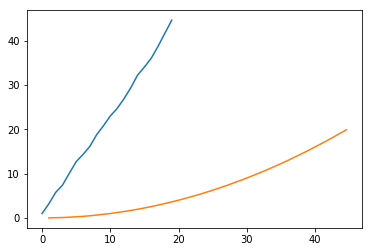

In [43]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas, numpy

# let's make randomly spaced sample series of y=x^2
x = (numpy.random.rand(20)*2+1).cumsum()
y = (x/10)**2

plt.plot(x)    # wonky
plt.plot(x, y) # smooth

2018-12-04 00:00:01.007928258     0.010159
2018-12-04 00:00:03.194601274     0.102055
2018-12-04 00:00:05.773292474     0.333309
2018-12-04 00:00:07.411183000     0.549256
2018-12-04 00:00:10.084493723     1.016970
2018-12-04 00:00:12.688179154     1.609899
2018-12-04 00:00:14.330517960     2.053637
2018-12-04 00:00:16.130748890     2.602011
2018-12-04 00:00:18.773039501     3.524270
2018-12-04 00:00:20.793648161     4.323758
2018-12-04 00:00:22.995456810     5.287910
2018-12-04 00:00:24.696522354     6.099182
2018-12-04 00:00:26.881026309     7.225896
2018-12-04 00:00:29.354290001     8.616743
2018-12-04 00:00:32.229587509    10.387463
2018-12-04 00:00:34.037577418    11.585567
2018-12-04 00:00:36.023262002    12.976754
2018-12-04 00:00:38.722457221    14.994287
2018-12-04 00:00:41.680741342    17.372842
2018-12-04 00:00:44.593360884    19.885678
dtype: float64

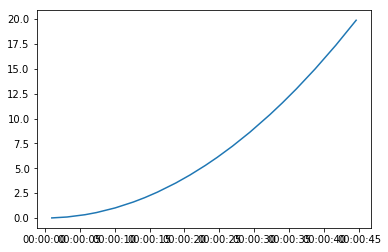

In [53]:
# Convert into a time series(always work in real time!)
t0begin = pandas.Timestamp("2018-12-04")
tseries = pandas.Series(pandas.Timedelta(seconds=1)*x)
tseries += t0begin
jseries = pandas.Series(y, index=tseries)
plt.plot(jseries)
jseries

In [51]:
numpy.linspace(0, 30, 31)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30.])

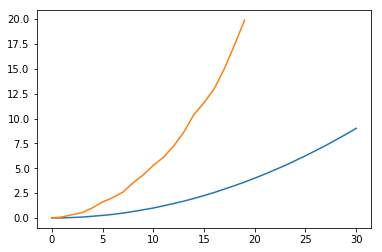

In [63]:
# This is my interpolation thing:
def InterpT(seriestime, seriesother):
    vals = numpy.interp(seriestime.index.asi8, seriesother.index.asi8, seriesother)
    return pandas.Series(vals, seriestime.index)

sseries = pandas.Series(pandas.Timedelta(seconds=1)*numpy.linspace(0, 30, 31))
sseries += t0begin
sseries = pandas.Series(numpy.zeros(len(sseries)), index=sseries)
sseries

iseries = InterpT(sseries, jseries)
plt.plot(list(iseries)) # smooth
plt.plot(list(jseries)) # wonky

In [73]:
tvalue = t0begin + pandas.Timedelta(seconds=5)
#numpy.interp(seriestime.index.asi8, seriesother.index.asi8, seriesother)
tvalue.value # same as asi8
numpy.interp(tvalue.value, jseries.index.asi8, jseries)

0.2639610097136384

In [78]:
def InterpTsingle(singletime, seriesother):
    return numpy.interp(singletime.value, jseries.index.asi8, jseries)

tvalue = t0begin + pandas.Timedelta(seconds=5)
print(InterpTsingle(tvalue, jseries))

0.2639610097136384


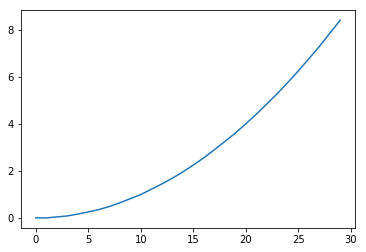

In [79]:
aa = list(range(30))
bb = [ InterpTsingle(t0begin + pandas.Timedelta(seconds=a), jseries)  for a in aa ]
plt.plot(aa, bb)

In [5]:
import shapefile
reader = shapefile.Reader('/home/julian/data/shapefiles/sin_CM6.shp') #Open input file

#/home/julian/data/shapefiles/sin_CM6.shp


In [9]:
shps = reader.shapes()

In [11]:
dir(shps[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_from_geojson',
 'bbox',
 'parts',
 'points',
 'shapeType',
 'shapeTypeName']

In [14]:
shp = shps[0]
shp.shapeTypeName
shp.points

[(35.53596883376208, 31.316576856313883),
 (35.53592225840793, 31.316664011054712),
 (35.53589838687156, 31.316723437271115),
 (35.5358858643067, 31.31677576808843),
 (35.535882379056, 31.31683024803764),
 (35.535895046007674, 31.3168877048784),
 (35.53590311324878, 31.316909499901147),
 (35.53591018678175, 31.317005091687676),
 (35.53588824944631, 31.31703876383909),
 (35.535867078716706, 31.31707837962351),
 (35.53587245097591, 31.317106447357446),
 (35.53584070371606, 31.31714556445271),
 (35.53585069343605, 31.317168680849576),
 (35.535886836966306, 31.317190815093795),
 (35.535889136837625, 31.317208646000967),
 (35.53582913344011, 31.317218862529717),
 (35.535813310188026, 31.317259187223772),
 (35.53581926332661, 31.31727817496845),
 (35.53583791303093, 31.31728693096327),
 (35.53587021166946, 31.317306422465496),
 (35.535843459218896, 31.31735709776053),
 (35.53582479767187, 31.317375417203642),
 (35.53580421364861, 31.31739241527195),
 (35.5357997819108, 31.31741239023626),
 (